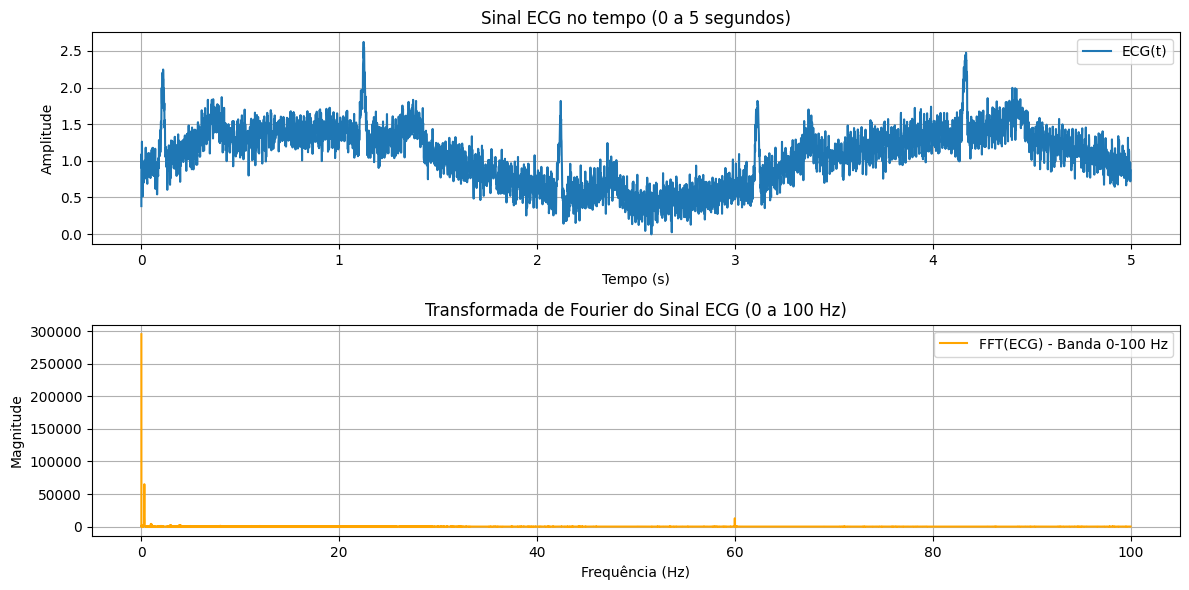

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Carregar os dados
data = pd.read_csv("datatf.csv", header=None, names=["tempo", "magnitude", "zero"])
tempo = data["tempo"].values
magnitude = data["magnitude"].values

# 2. Configurar parâmetros
fs = 1000  # Frequência de amostragem (Hz)
N = len(magnitude)  # Número total de amostras

# Garantir que os dados sejam compatíveis com a análise
if len(magnitude) < N:
    N = len(magnitude)

# 3. Calcular a FFT
fft_result = np.fft.fft(magnitude, n=N)  # FFT da magnitude
frequencies = np.fft.fftfreq(N, d=1/fs)  # Frequências associadas
fft_magnitude = np.abs(fft_result[:N // 2])  # Magnitude da FFT (parte positiva)
positive_frequencies = frequencies[:N // 2]  # Apenas as frequências positivas

# 4. Focar na banda de interesse (0 a 100 Hz)
freq_limit = 100
band_index = positive_frequencies <= freq_limit
filtered_frequencies = positive_frequencies[band_index]
filtered_fft_magnitude = fft_magnitude[band_index]

# 5. Plotar o sinal no tempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tempo[:min(len(tempo), 5000)], magnitude[:min(len(magnitude), 5000)], label="ECG(t)")
plt.title("Sinal ECG no tempo (0 a 5 segundos)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# 6. Plotar a FFT (apenas banda útil)
plt.subplot(2, 1, 2)
plt.plot(filtered_frequencies, filtered_fft_magnitude, label="FFT(ECG) - Banda 0-100 Hz", color="orange")
plt.title("Transformada de Fourier do Sinal ECG (0 a 100 Hz)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
